## webscraping and Eda project

In [1]:
# Loading required libraries
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from selenium.webdriver.common.by import By

## code for webscraping

In [2]:
website = 'https://www.cars24.com/buy-used-car?sort=P&storeCityId=3686&pinId=500001'
path = 'C:/Users/hrush/Downloads/edgedriver_win64/msedgedriver'
driver = webdriver.Edge(path)
driver.get(website)

C:\Users\hrush\AppData\Local\Temp\ipykernel_12576\2708832706.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Edge(path)


In [5]:
# Scrapping the Web Page

title=driver.find_elements(By.CLASS_NAME,'_3FpCg')
engine=driver.find_elements(By.CLASS_NAME,'cvakB')
detail=driver.find_elements(By.CLASS_NAME,'bVR0c')
price=driver.find_elements(By.CLASS_NAME,'_7udZZ')


titles = []
engines = []
details = []
prices = []

for values in title:
    titles.append(values.text)
    
for values in engine:
    engines.append(values.text)
    
for values in detail:
    details.append(values.text)

for values in price:
    prices.append(values.text)

In [6]:
print(len(titles))
print(len(engines))
print(len(details))
print(len(prices))

577
577
577
577


In [7]:
driver.quit()

## creating a dataframe and saving it in a csv file

In [6]:
import pandas as pd

In [7]:
df = pd.DataFrame({'car_title' : titles, 'engine_transmission' : engines, 'car_details' : details, 'car_price' : prices})

In [8]:
df.head()

,car_title,engine_transmission,car_details,car_price
0,2015 Maruti Swift Dzire,VXI Manual,"94,590 km\n1st Owner\nPetrol\nTS-07","₹4,70,699"
1,2014 Hyundai Eon,ERA PLUS Manual,"69,079 km\n1st Owner\nPetrol\nTS-10","₹2,92,299"
2,2018 Maruti Ertiga,ZDI PLUS SHVS Manual,"68,297 km\n1st Owner\nDiesel\nTS-07","₹9,93,899"
3,2020 Maruti Swift,VXI Manual,"10,056 km\n2nd Owner\nPetrol\nAP-39","₹6,43,499"
4,2021 Mahindra Scorpio,S11 Manual,"43,956 km\n1st Owner\nDiesel\nAP-39","₹16,29,399"


In [9]:
df.tail()

,car_title,engine_transmission,car_details,car_price
510,2021 Renault Kwid,1.0 RXT Opt Manual,"23,026 km\n1st Owner\nPetrol\nTS-10","₹4,89,299"
511,2017 Volkswagen Ameo,COMFORTLINE 1.2 Manual,"94,983 km\n1st Owner\nPetrol\nTS-07","₹5,50,999"
512,2018 Maruti Swift,ZXI AMT Automatic,"12,164 km\n1st Owner\nPetrol\nTS-07","₹7,47,699"
513,2019 Ford Ecosport,1.5TITANIUM TDCI Manual,"51,782 km\n2nd Owner\nDiesel\nTS-07","₹8,84,599"
514,2017 Hyundai Grand i10,SPORTZ (O) 1.2 AT VTVT Automatic,"36,725 km\n1st Owner\nPetrol\nTS-10","₹6,31,499"


In [10]:
df.shape

(515, 4)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_title            515 non-null    object
 1   engine_transmission  515 non-null    object
 2   car_details          515 non-null    object
 3   car_price            515 non-null    object
dtypes: object(4)
memory usage: 16.2+ KB


In [13]:
df.describe()

,car_title,engine_transmission,car_details,car_price
count,515,515,515,515
unique,249,239,515,501
top,2017 Hyundai Grand i10,VXI Manual,"94,590 km\n1st Owner\nPetrol\nTS-07","₹4,70,699"
freq,14,64,1,2


## saving dataframe to a csv file

In [14]:
import os
os.getcwd()

'C:\\Users\\hrush'

In [15]:
df.to_csv('C:\\Users\\hrush\\cars24_websrapingandEDA_project.csv', index = False)

In [17]:
df.isnull().sum()

car_title              0
engine_transmission    0
car_details            0
car_price              0
dtype: int64

## Extracting the Details using Regex

In [8]:
import numpy as np
import pandas as pd
import re

In [9]:
df = pd.read_csv('C:\\Users\\hrush\\cars24_websrapingandEDA_project.csv')

In [10]:
df.head()

,car_title,engine_transmission,car_details,car_price
0,2015 Maruti Swift Dzire,VXI Manual,"94,590 km\n1st Owner\nPetrol\nTS-07","₹4,70,699"
1,2014 Hyundai Eon,ERA PLUS Manual,"69,079 km\n1st Owner\nPetrol\nTS-10","₹2,92,299"
2,2018 Maruti Ertiga,ZDI PLUS SHVS Manual,"68,297 km\n1st Owner\nDiesel\nTS-07","₹9,93,899"
3,2020 Maruti Swift,VXI Manual,"10,056 km\n2nd Owner\nPetrol\nAP-39","₹6,43,499"
4,2021 Mahindra Scorpio,S11 Manual,"43,956 km\n1st Owner\nDiesel\nAP-39","₹16,29,399"


In [11]:
print(df['car_details'][0])

94,590 km
1st Owner
Petrol
TS-07


In [12]:
# km driven Information
regex = r'\d+,\d+'

df['car_details'].apply(lambda x : re.findall(regex,x))


0      [94,590]
1      [69,079]
2      [68,297]
3      [10,056]
4      [43,956]
         ...   
510    [23,026]
511    [94,983]
512    [12,164]
513    [51,782]
514    [36,725]
Name: car_details, Length: 515, dtype: object

In [13]:
df['km_driven'] = df['car_details'].apply(lambda x : re.findall(regex, x))

In [14]:
df.head()

,car_title,engine_transmission,car_details,car_price,km_driven
0,2015 Maruti Swift Dzire,VXI Manual,"94,590 km\n1st Owner\nPetrol\nTS-07","₹4,70,699","[94,590]"
1,2014 Hyundai Eon,ERA PLUS Manual,"69,079 km\n1st Owner\nPetrol\nTS-10","₹2,92,299","[69,079]"
2,2018 Maruti Ertiga,ZDI PLUS SHVS Manual,"68,297 km\n1st Owner\nDiesel\nTS-07","₹9,93,899","[68,297]"
3,2020 Maruti Swift,VXI Manual,"10,056 km\n2nd Owner\nPetrol\nAP-39","₹6,43,499","[10,056]"
4,2021 Mahindra Scorpio,S11 Manual,"43,956 km\n1st Owner\nDiesel\nAP-39","₹16,29,399","[43,956]"


In [15]:
## ownership information

regex =  '\d[a-z][a-z]'

df['car_details'].apply(lambda x : re.findall(regex, x))

0      [1st]
1      [1st]
2      [1st]
3      [2nd]
4      [1st]
       ...  
510    [1st]
511    [1st]
512    [1st]
513    [2nd]
514    [1st]
Name: car_details, Length: 515, dtype: object

In [16]:
df['ownership'] = df['car_details'].apply(lambda x : re.findall(regex, x))

In [17]:
df.head()

,car_title,engine_transmission,car_details,car_price,km_driven,ownership
0,2015 Maruti Swift Dzire,VXI Manual,"94,590 km\n1st Owner\nPetrol\nTS-07","₹4,70,699","[94,590]",[1st]
1,2014 Hyundai Eon,ERA PLUS Manual,"69,079 km\n1st Owner\nPetrol\nTS-10","₹2,92,299","[69,079]",[1st]
2,2018 Maruti Ertiga,ZDI PLUS SHVS Manual,"68,297 km\n1st Owner\nDiesel\nTS-07","₹9,93,899","[68,297]",[1st]
3,2020 Maruti Swift,VXI Manual,"10,056 km\n2nd Owner\nPetrol\nAP-39","₹6,43,499","[10,056]",[2nd]
4,2021 Mahindra Scorpio,S11 Manual,"43,956 km\n1st Owner\nDiesel\nAP-39","₹16,29,399","[43,956]",[1st]


In [18]:
## fuel type information
regex =  '[^\\n\s]\w\w\w\w\w'

df['car_details'].apply(lambda x : re.findall(regex, x))

0      [Petrol]
1      [Petrol]
2      [Diesel]
3      [Petrol]
4      [Diesel]
         ...   
510    [Petrol]
511    [Petrol]
512    [Petrol]
513    [Diesel]
514    [Petrol]
Name: car_details, Length: 515, dtype: object

In [19]:
df['fuel_type'] = df['car_details'].apply(lambda x : re.findall(regex, x))
df.head()

,car_title,engine_transmission,car_details,car_price,km_driven,ownership,fuel_type
0,2015 Maruti Swift Dzire,VXI Manual,"94,590 km\n1st Owner\nPetrol\nTS-07","₹4,70,699","[94,590]",[1st],[Petrol]
1,2014 Hyundai Eon,ERA PLUS Manual,"69,079 km\n1st Owner\nPetrol\nTS-10","₹2,92,299","[69,079]",[1st],[Petrol]
2,2018 Maruti Ertiga,ZDI PLUS SHVS Manual,"68,297 km\n1st Owner\nDiesel\nTS-07","₹9,93,899","[68,297]",[1st],[Diesel]
3,2020 Maruti Swift,VXI Manual,"10,056 km\n2nd Owner\nPetrol\nAP-39","₹6,43,499","[10,056]",[2nd],[Petrol]
4,2021 Mahindra Scorpio,S11 Manual,"43,956 km\n1st Owner\nDiesel\nAP-39","₹16,29,399","[43,956]",[1st],[Diesel]


In [20]:
## registration information

regex =  '\w\w-\d\d'

df['car_details'].apply(lambda x : re.findall(regex, x))

0      [TS-07]
1      [TS-10]
2      [TS-07]
3      [AP-39]
4      [AP-39]
        ...   
510    [TS-10]
511    [TS-07]
512    [TS-07]
513    [TS-07]
514    [TS-10]
Name: car_details, Length: 515, dtype: object

In [21]:
df['Registration'] = df['car_details'].apply(lambda x : re.findall(regex, x))
df.head()

,car_title,engine_transmission,car_details,car_price,km_driven,ownership,fuel_type,Registration
0,2015 Maruti Swift Dzire,VXI Manual,"94,590 km\n1st Owner\nPetrol\nTS-07","₹4,70,699","[94,590]",[1st],[Petrol],[TS-07]
1,2014 Hyundai Eon,ERA PLUS Manual,"69,079 km\n1st Owner\nPetrol\nTS-10","₹2,92,299","[69,079]",[1st],[Petrol],[TS-10]
2,2018 Maruti Ertiga,ZDI PLUS SHVS Manual,"68,297 km\n1st Owner\nDiesel\nTS-07","₹9,93,899","[68,297]",[1st],[Diesel],[TS-07]
3,2020 Maruti Swift,VXI Manual,"10,056 km\n2nd Owner\nPetrol\nAP-39","₹6,43,499","[10,056]",[2nd],[Petrol],[AP-39]
4,2021 Mahindra Scorpio,S11 Manual,"43,956 km\n1st Owner\nDiesel\nAP-39","₹16,29,399","[43,956]",[1st],[Diesel],[AP-39]


In [22]:
## model_year information

regex =  '\d\d\d\d'

df['car_title'].apply(lambda x : re.findall(regex, x))

0      [2015]
1      [2014]
2      [2018]
3      [2020]
4      [2021]
        ...  
510    [2021]
511    [2017]
512    [2018]
513    [2019]
514    [2017]
Name: car_title, Length: 515, dtype: object

In [23]:
df['car_model_year'] = df['car_title'].apply(lambda x : re.findall(regex, x))
df.head()

,car_title,engine_transmission,car_details,car_price,km_driven,ownership,fuel_type,Registration,car_model_year
0,2015 Maruti Swift Dzire,VXI Manual,"94,590 km\n1st Owner\nPetrol\nTS-07","₹4,70,699","[94,590]",[1st],[Petrol],[TS-07],[2015]
1,2014 Hyundai Eon,ERA PLUS Manual,"69,079 km\n1st Owner\nPetrol\nTS-10","₹2,92,299","[69,079]",[1st],[Petrol],[TS-10],[2014]
2,2018 Maruti Ertiga,ZDI PLUS SHVS Manual,"68,297 km\n1st Owner\nDiesel\nTS-07","₹9,93,899","[68,297]",[1st],[Diesel],[TS-07],[2018]
3,2020 Maruti Swift,VXI Manual,"10,056 km\n2nd Owner\nPetrol\nAP-39","₹6,43,499","[10,056]",[2nd],[Petrol],[AP-39],[2020]
4,2021 Mahindra Scorpio,S11 Manual,"43,956 km\n1st Owner\nDiesel\nAP-39","₹16,29,399","[43,956]",[1st],[Diesel],[AP-39],[2021]


In [24]:
##car_name information

regex =  '[^\d+]\w+'

df['car_title'].apply(lambda x : re.findall(regex, x))

0      [ Maruti,  Swift,  Dzire]
1               [ Hyundai,  Eon]
2             [ Maruti,  Ertiga]
3              [ Maruti,  Swift]
4          [ Mahindra,  Scorpio]
                 ...            
510            [ Renault,  Kwid]
511         [ Volkswagen,  Ameo]
512            [ Maruti,  Swift]
513           [ Ford,  Ecosport]
514     [ Hyundai,  Grand,  i10]
Name: car_title, Length: 515, dtype: object

In [25]:
df['car_name'] = df['car_title'].apply(lambda x : re.findall(regex, x))

In [26]:
df.head()

,car_title,engine_transmission,car_details,car_price,km_driven,ownership,fuel_type,Registration,car_model_year,car_name
0,2015 Maruti Swift Dzire,VXI Manual,"94,590 km\n1st Owner\nPetrol\nTS-07","₹4,70,699","[94,590]",[1st],[Petrol],[TS-07],[2015],"[ Maruti, Swift, Dzire]"
1,2014 Hyundai Eon,ERA PLUS Manual,"69,079 km\n1st Owner\nPetrol\nTS-10","₹2,92,299","[69,079]",[1st],[Petrol],[TS-10],[2014],"[ Hyundai, Eon]"
2,2018 Maruti Ertiga,ZDI PLUS SHVS Manual,"68,297 km\n1st Owner\nDiesel\nTS-07","₹9,93,899","[68,297]",[1st],[Diesel],[TS-07],[2018],"[ Maruti, Ertiga]"
3,2020 Maruti Swift,VXI Manual,"10,056 km\n2nd Owner\nPetrol\nAP-39","₹6,43,499","[10,056]",[2nd],[Petrol],[AP-39],[2020],"[ Maruti, Swift]"
4,2021 Mahindra Scorpio,S11 Manual,"43,956 km\n1st Owner\nDiesel\nAP-39","₹16,29,399","[43,956]",[1st],[Diesel],[AP-39],[2021],"[ Mahindra, Scorpio]"


In [27]:
## transmission information

regex ='(Manual|Automatic|AMT|MT)'

df['engine_transmission'].apply(lambda x : re.findall(regex, x))

0              [Manual]
1              [Manual]
2              [Manual]
3              [Manual]
4              [Manual]
             ...       
510            [Manual]
511            [Manual]
512    [AMT, Automatic]
513            [Manual]
514         [Automatic]
Name: engine_transmission, Length: 515, dtype: object

In [28]:
df['transmission'] = df['engine_transmission'].apply(lambda x : re.findall(regex, x))
df.head()

,car_title,engine_transmission,car_details,car_price,km_driven,ownership,fuel_type,Registration,car_model_year,car_name,transmission
0,2015 Maruti Swift Dzire,VXI Manual,"94,590 km\n1st Owner\nPetrol\nTS-07","₹4,70,699","[94,590]",[1st],[Petrol],[TS-07],[2015],"[ Maruti, Swift, Dzire]",[Manual]
1,2014 Hyundai Eon,ERA PLUS Manual,"69,079 km\n1st Owner\nPetrol\nTS-10","₹2,92,299","[69,079]",[1st],[Petrol],[TS-10],[2014],"[ Hyundai, Eon]",[Manual]
2,2018 Maruti Ertiga,ZDI PLUS SHVS Manual,"68,297 km\n1st Owner\nDiesel\nTS-07","₹9,93,899","[68,297]",[1st],[Diesel],[TS-07],[2018],"[ Maruti, Ertiga]",[Manual]
3,2020 Maruti Swift,VXI Manual,"10,056 km\n2nd Owner\nPetrol\nAP-39","₹6,43,499","[10,056]",[2nd],[Petrol],[AP-39],[2020],"[ Maruti, Swift]",[Manual]
4,2021 Mahindra Scorpio,S11 Manual,"43,956 km\n1st Owner\nDiesel\nAP-39","₹16,29,399","[43,956]",[1st],[Diesel],[AP-39],[2021],"[ Mahindra, Scorpio]",[Manual]


## cleaning the data

In [29]:
df.shape

(515, 11)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_title            515 non-null    object
 1   engine_transmission  515 non-null    object
 2   car_details          515 non-null    object
 3   car_price            515 non-null    object
 4   km_driven            515 non-null    object
 5   ownership            515 non-null    object
 6   fuel_type            515 non-null    object
 7   Registration         515 non-null    object
 8   car_model_year       515 non-null    object
 9   car_name             515 non-null    object
 10  transmission         515 non-null    object
dtypes: object(11)
memory usage: 44.4+ KB


In [31]:
# Missing Values

df.isnull().sum()

car_title              0
engine_transmission    0
car_details            0
car_price              0
km_driven              0
ownership              0
fuel_type              0
Registration           0
car_model_year         0
car_name               0
transmission           0
dtype: int64

In [32]:
df.head()

,car_title,engine_transmission,car_details,car_price,km_driven,ownership,fuel_type,Registration,car_model_year,car_name,transmission
0,2015 Maruti Swift Dzire,VXI Manual,"94,590 km\n1st Owner\nPetrol\nTS-07","₹4,70,699","[94,590]",[1st],[Petrol],[TS-07],[2015],"[ Maruti, Swift, Dzire]",[Manual]
1,2014 Hyundai Eon,ERA PLUS Manual,"69,079 km\n1st Owner\nPetrol\nTS-10","₹2,92,299","[69,079]",[1st],[Petrol],[TS-10],[2014],"[ Hyundai, Eon]",[Manual]
2,2018 Maruti Ertiga,ZDI PLUS SHVS Manual,"68,297 km\n1st Owner\nDiesel\nTS-07","₹9,93,899","[68,297]",[1st],[Diesel],[TS-07],[2018],"[ Maruti, Ertiga]",[Manual]
3,2020 Maruti Swift,VXI Manual,"10,056 km\n2nd Owner\nPetrol\nAP-39","₹6,43,499","[10,056]",[2nd],[Petrol],[AP-39],[2020],"[ Maruti, Swift]",[Manual]
4,2021 Mahindra Scorpio,S11 Manual,"43,956 km\n1st Owner\nDiesel\nAP-39","₹16,29,399","[43,956]",[1st],[Diesel],[AP-39],[2021],"[ Mahindra, Scorpio]",[Manual]


In [33]:
df.km_driven = df.km_driven.apply(lambda x : ''.join(x))
df.fuel_type = df.fuel_type.apply(lambda x : ''.join(x))
df.ownership = df.ownership.apply(lambda x : ''.join(x))
df.Registration = df.Registration.apply(lambda x : ''.join(x))
df.car_model_year = df.car_model_year.apply(lambda x : ''.join(x))
df.car_name = df.car_name.apply(lambda x : ''.join(x))
df.transmission = df.transmission.apply(lambda x : ''.join(x))

In [34]:
df.head()

,car_title,engine_transmission,car_details,car_price,km_driven,ownership,fuel_type,Registration,car_model_year,car_name,transmission
0,2015 Maruti Swift Dzire,VXI Manual,"94,590 km\n1st Owner\nPetrol\nTS-07","₹4,70,699","94,590",1st,Petrol,TS-07,2015,Maruti Swift Dzire,Manual
1,2014 Hyundai Eon,ERA PLUS Manual,"69,079 km\n1st Owner\nPetrol\nTS-10","₹2,92,299","69,079",1st,Petrol,TS-10,2014,Hyundai Eon,Manual
2,2018 Maruti Ertiga,ZDI PLUS SHVS Manual,"68,297 km\n1st Owner\nDiesel\nTS-07","₹9,93,899","68,297",1st,Diesel,TS-07,2018,Maruti Ertiga,Manual
3,2020 Maruti Swift,VXI Manual,"10,056 km\n2nd Owner\nPetrol\nAP-39","₹6,43,499","10,056",2nd,Petrol,AP-39,2020,Maruti Swift,Manual
4,2021 Mahindra Scorpio,S11 Manual,"43,956 km\n1st Owner\nDiesel\nAP-39","₹16,29,399","43,956",1st,Diesel,AP-39,2021,Mahindra Scorpio,Manual


In [35]:
df['car_title'].apply(lambda x : re.findall('\A\w+\s\w+', x))

0          [2015 Maruti]
1         [2014 Hyundai]
2          [2018 Maruti]
3          [2020 Maruti]
4        [2021 Mahindra]
             ...        
510       [2021 Renault]
511    [2017 Volkswagen]
512        [2018 Maruti]
513          [2019 Ford]
514       [2017 Hyundai]
Name: car_title, Length: 515, dtype: object

In [43]:
## brand information
df['car_title'].apply(lambda x : re.findall('\A\w+\s\w+', x))

0          [2015 Maruti]
1         [2014 Hyundai]
2          [2018 Maruti]
3          [2020 Maruti]
4        [2021 Mahindra]
             ...        
510       [2021 Renault]
511    [2017 Volkswagen]
512        [2018 Maruti]
513          [2019 Ford]
514       [2017 Hyundai]
Name: car_title, Length: 515, dtype: object

In [44]:
df["brand0"]=df['car_title'].apply(lambda x : re.findall('\A\w+\s\w+', x))

In [45]:
df.head()

,car_title,engine_transmission,car_details,car_price,km_driven,ownership,fuel_type,Registration,car_model_year,car_name,transmission,brand1,brand0
0,2015 Maruti Swift Dzire,VXI Manual,"94,590 km\n1st Owner\nPetrol\nTS-07","₹4,70,699","94,590",1st,Petrol,TS-07,2015,Maruti Swift Dzire,Manual,[2015 Maruti],[2015 Maruti]
1,2014 Hyundai Eon,ERA PLUS Manual,"69,079 km\n1st Owner\nPetrol\nTS-10","₹2,92,299","69,079",1st,Petrol,TS-10,2014,Hyundai Eon,Manual,[2014 Hyundai],[2014 Hyundai]
2,2018 Maruti Ertiga,ZDI PLUS SHVS Manual,"68,297 km\n1st Owner\nDiesel\nTS-07","₹9,93,899","68,297",1st,Diesel,TS-07,2018,Maruti Ertiga,Manual,[2018 Maruti],[2018 Maruti]
3,2020 Maruti Swift,VXI Manual,"10,056 km\n2nd Owner\nPetrol\nAP-39","₹6,43,499","10,056",2nd,Petrol,AP-39,2020,Maruti Swift,Manual,[2020 Maruti],[2020 Maruti]
4,2021 Mahindra Scorpio,S11 Manual,"43,956 km\n1st Owner\nDiesel\nAP-39","₹16,29,399","43,956",1st,Diesel,AP-39,2021,Mahindra Scorpio,Manual,[2021 Mahindra],[2021 Mahindra]


In [51]:
df.brand0 = df.brand0.apply(lambda x : ''.join(x))

In [52]:
df.head()

,car_title,engine_transmission,car_details,car_price,km_driven,ownership,fuel_type,Registration,car_model_year,car_name,transmission,brand1,brand0
0,2015 Maruti Swift Dzire,VXI Manual,"94,590 km\n1st Owner\nPetrol\nTS-07","₹4,70,699","94,590",1st,Petrol,TS-07,2015,Maruti Swift Dzire,Manual,[2015 Maruti],2015 Maruti
1,2014 Hyundai Eon,ERA PLUS Manual,"69,079 km\n1st Owner\nPetrol\nTS-10","₹2,92,299","69,079",1st,Petrol,TS-10,2014,Hyundai Eon,Manual,[2014 Hyundai],2014 Hyundai
2,2018 Maruti Ertiga,ZDI PLUS SHVS Manual,"68,297 km\n1st Owner\nDiesel\nTS-07","₹9,93,899","68,297",1st,Diesel,TS-07,2018,Maruti Ertiga,Manual,[2018 Maruti],2018 Maruti
3,2020 Maruti Swift,VXI Manual,"10,056 km\n2nd Owner\nPetrol\nAP-39","₹6,43,499","10,056",2nd,Petrol,AP-39,2020,Maruti Swift,Manual,[2020 Maruti],2020 Maruti
4,2021 Mahindra Scorpio,S11 Manual,"43,956 km\n1st Owner\nDiesel\nAP-39","₹16,29,399","43,956",1st,Diesel,AP-39,2021,Mahindra Scorpio,Manual,[2021 Mahindra],2021 Mahindra


In [53]:
df['brand0'].apply(lambda x : re.findall('[^\d\s]\w+', x))

0          [Maruti]
1         [Hyundai]
2          [Maruti]
3          [Maruti]
4        [Mahindra]
           ...     
510       [Renault]
511    [Volkswagen]
512        [Maruti]
513          [Ford]
514       [Hyundai]
Name: brand0, Length: 515, dtype: object

In [54]:
df["brand"]=df['brand0'].apply(lambda x : re.findall('[^\d\s]\w+', x))

In [55]:
df.brand = df.brand.apply(lambda x : ''.join(x))

In [56]:
df.head()

,car_title,engine_transmission,car_details,car_price,km_driven,ownership,fuel_type,Registration,car_model_year,car_name,transmission,brand1,brand0,brand
0,2015 Maruti Swift Dzire,VXI Manual,"94,590 km\n1st Owner\nPetrol\nTS-07","₹4,70,699","94,590",1st,Petrol,TS-07,2015,Maruti Swift Dzire,Manual,[2015 Maruti],2015 Maruti,Maruti
1,2014 Hyundai Eon,ERA PLUS Manual,"69,079 km\n1st Owner\nPetrol\nTS-10","₹2,92,299","69,079",1st,Petrol,TS-10,2014,Hyundai Eon,Manual,[2014 Hyundai],2014 Hyundai,Hyundai
2,2018 Maruti Ertiga,ZDI PLUS SHVS Manual,"68,297 km\n1st Owner\nDiesel\nTS-07","₹9,93,899","68,297",1st,Diesel,TS-07,2018,Maruti Ertiga,Manual,[2018 Maruti],2018 Maruti,Maruti
3,2020 Maruti Swift,VXI Manual,"10,056 km\n2nd Owner\nPetrol\nAP-39","₹6,43,499","10,056",2nd,Petrol,AP-39,2020,Maruti Swift,Manual,[2020 Maruti],2020 Maruti,Maruti
4,2021 Mahindra Scorpio,S11 Manual,"43,956 km\n1st Owner\nDiesel\nAP-39","₹16,29,399","43,956",1st,Diesel,AP-39,2021,Mahindra Scorpio,Manual,[2021 Mahindra],2021 Mahindra,Mahindra


In [57]:
del df['brand1']
del df['brand0']

In [58]:
df.car_price = df.car_price.apply(lambda x : x.replace('₹', '').replace(',', '')).astype(float)

In [59]:
df.km_driven = df.km_driven.apply(lambda x : x.replace(',', '')).astype(float)

In [60]:
df.car_model_year = df.car_model_year.astype(float)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_title            515 non-null    object 
 1   engine_transmission  515 non-null    object 
 2   car_details          515 non-null    object 
 3   car_price            515 non-null    float64
 4   km_driven            515 non-null    float64
 5   ownership            515 non-null    object 
 6   fuel_type            515 non-null    object 
 7   Registration         515 non-null    object 
 8   car_model_year       515 non-null    float64
 9   car_name             515 non-null    object 
 10  transmission         515 non-null    object 
 11  brand                515 non-null    object 
dtypes: float64(3), object(9)
memory usage: 48.4+ KB


In [62]:
df.rename(columns = {'car_model_year':'model_year'}, inplace = True)

In [63]:
df.replace(to_replace=["MTManual","MT"],value="Manual")
df.replace(to_replace=["AMTAutomatic","AMT"],value="Automatic")
df.replace(to_replace=["MARUTI"],value="Maruti")
df.replace(to_replace=["SKODA"],value="Skoda")

,car_title,engine_transmission,car_details,car_price,km_driven,ownership,fuel_type,Registration,model_year,car_name,transmission,brand
0,2015 Maruti Swift Dzire,VXI Manual,"94,590 km\n1st Owner\nPetrol\nTS-07",470699.0,94590.0,1st,Petrol,TS-07,2015.0,Maruti Swift Dzire,Manual,Maruti
1,2014 Hyundai Eon,ERA PLUS Manual,"69,079 km\n1st Owner\nPetrol\nTS-10",292299.0,69079.0,1st,Petrol,TS-10,2014.0,Hyundai Eon,Manual,Hyundai
2,2018 Maruti Ertiga,ZDI PLUS SHVS Manual,"68,297 km\n1st Owner\nDiesel\nTS-07",993899.0,68297.0,1st,Diesel,TS-07,2018.0,Maruti Ertiga,Manual,Maruti
3,2020 Maruti Swift,VXI Manual,"10,056 km\n2nd Owner\nPetrol\nAP-39",643499.0,10056.0,2nd,Petrol,AP-39,2020.0,Maruti Swift,Manual,Maruti
4,2021 Mahindra Scorpio,S11 Manual,"43,956 km\n1st Owner\nDiesel\nAP-39",1629399.0,43956.0,1st,Diesel,AP-39,2021.0,Mahindra Scorpio,Manual,Mahindra
...,...,...,...,...,...,...,...,...,...,...,...,...
510,2021 Renault Kwid,1.0 RXT Opt Manual,"23,026 km\n1st Owner\nPetrol\nTS-10",489299.0,23026.0,1st,Petrol,TS-10,2021.0,Renault Kwid,Manual,Renault
511,2017 Volkswagen Ameo,COMFORTLINE 1.2 Manual,"94,983 km\n1st Owner\nPetrol\nTS-07",550999.0,94983.0,1st,Petrol,TS-07,2017.0,Volkswagen Ameo,Manual,Volkswagen
512,2018 Maruti Swift,ZXI AMT Automatic,"12,164 km\n1st Owner\nPetrol\nTS-07",747699.0,12164.0,1st,Petrol,TS-07,2018.0,Maruti Swift,AMTAutomatic,Maruti
513,2019 Ford Ecosport,1.5TITANIUM TDCI Manual,"51,782 km\n2nd Owner\nDiesel\nTS-07",884599.0,51782.0,2nd,Diesel,TS-07,2019.0,Ford Ecosport,Manual,Ford


In [69]:
first_column = df.pop('brand')
df.insert(0, 'brand', first_column)

In [70]:
df.head()

,brand,car_title,engine_transmission,car_details,car_price,km_driven,ownership,fuel_type,Registration,model_year,car_name,transmission
0,Maruti,2015 Maruti Swift Dzire,VXI Manual,"94,590 km\n1st Owner\nPetrol\nTS-07",470699.0,94590.0,1st,Petrol,TS-07,2015.0,Maruti Swift Dzire,Manual
1,Hyundai,2014 Hyundai Eon,ERA PLUS Manual,"69,079 km\n1st Owner\nPetrol\nTS-10",292299.0,69079.0,1st,Petrol,TS-10,2014.0,Hyundai Eon,Manual
2,Maruti,2018 Maruti Ertiga,ZDI PLUS SHVS Manual,"68,297 km\n1st Owner\nDiesel\nTS-07",993899.0,68297.0,1st,Diesel,TS-07,2018.0,Maruti Ertiga,Manual
3,Maruti,2020 Maruti Swift,VXI Manual,"10,056 km\n2nd Owner\nPetrol\nAP-39",643499.0,10056.0,2nd,Petrol,AP-39,2020.0,Maruti Swift,Manual
4,Mahindra,2021 Mahindra Scorpio,S11 Manual,"43,956 km\n1st Owner\nDiesel\nAP-39",1629399.0,43956.0,1st,Diesel,AP-39,2021.0,Mahindra Scorpio,Manual


In [71]:
df.dtypes

brand                  category
car_title                object
engine_transmission      object
car_details              object
car_price               float64
km_driven               float64
ownership              category
fuel_type              category
Registration             object
model_year              float64
car_name                 object
transmission           category
dtype: object

In [72]:
df['transmission'] = df['transmission'].astype('category')
df['ownership'] = df['ownership'].astype('category')
df['fuel_type'] = df['fuel_type'].astype('category')
df['brand'] = df['brand'].astype('category')

In [73]:
df.dtypes

brand                  category
car_title                object
engine_transmission      object
car_details              object
car_price               float64
km_driven               float64
ownership              category
fuel_type              category
Registration             object
model_year              float64
car_name                 object
transmission           category
dtype: object

## Data visualization

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df.head()

,brand,car_title,engine_transmission,car_details,car_price,km_driven,ownership,fuel_type,Registration,model_year,car_name,transmission
0,Maruti,2015 Maruti Swift Dzire,VXI Manual,"94,590 km\n1st Owner\nPetrol\nTS-07",470699.0,94590.0,1st,Petrol,TS-07,2015.0,Maruti Swift Dzire,Manual
1,Hyundai,2014 Hyundai Eon,ERA PLUS Manual,"69,079 km\n1st Owner\nPetrol\nTS-10",292299.0,69079.0,1st,Petrol,TS-10,2014.0,Hyundai Eon,Manual
2,Maruti,2018 Maruti Ertiga,ZDI PLUS SHVS Manual,"68,297 km\n1st Owner\nDiesel\nTS-07",993899.0,68297.0,1st,Diesel,TS-07,2018.0,Maruti Ertiga,Manual
3,Maruti,2020 Maruti Swift,VXI Manual,"10,056 km\n2nd Owner\nPetrol\nAP-39",643499.0,10056.0,2nd,Petrol,AP-39,2020.0,Maruti Swift,Manual
4,Mahindra,2021 Mahindra Scorpio,S11 Manual,"43,956 km\n1st Owner\nDiesel\nAP-39",1629399.0,43956.0,1st,Diesel,AP-39,2021.0,Mahindra Scorpio,Manual


In [75]:
df.shape

(515, 12)

## uni-variate analysis

Text(0.5, 1.0, 'value counts=Petrol    80.0\nDiesel    20.0\nName: fuel_type, dtype: float64 \nn_uniques=2 ')

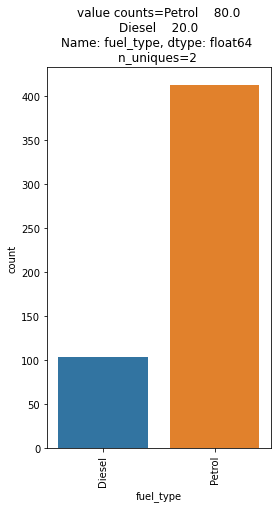

In [76]:
## count plot of fuel_type

plt.figure(figsize=(4, 7))
sns.countplot(x=df.fuel_type)
plt.xticks(rotation = 90)

norm_count = df.fuel_type.value_counts(normalize = True)*100
n_uni = df.fuel_type.nunique()

plt.title(f'value counts={norm_count} \nn_uniques={n_uni} ')

Text(0.5, 1.0, 'std_dev = 359410.3402693967 \nmean = 687828.027184466 \nmedian = 587399.0')

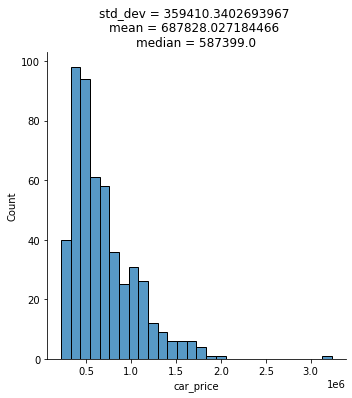

In [168]:
## distribution plot of car_price

sns.displot(df["car_price"])
mea = df.car_price.mean()
median = df.car_price.median()
st_dev = df.car_price.std()

plt.title(f'std_dev = {st_dev} \nmean = {mea} \nmedian = {median}')

Text(0.5, 1.0, 'std_dev = 26121.5025682702 \nmean = 50726.46213592233 \nmedian = 50635.0')

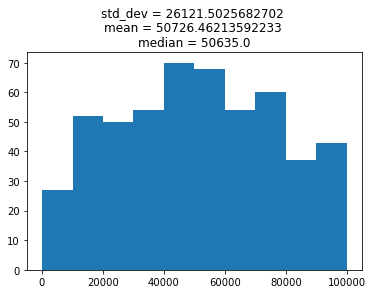

In [172]:
## histogram plot of km_driven

plt.hist(df['km_driven'])

mea = df.km_driven.mean()
median = df.km_driven.median()
st_dev = df.km_driven.std()

plt.title(f'std_dev = {st_dev} \nmean = {mea} \nmedian = {median}')

<AxesSubplot:ylabel='brand'>

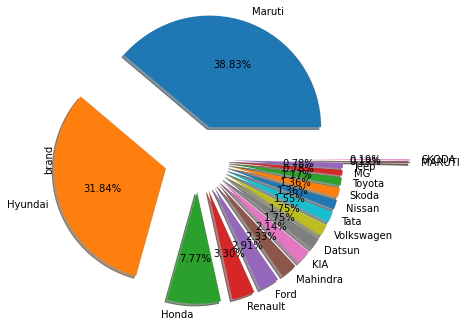

In [170]:
## pie chart of brand

df["brand"].value_counts().plot.pie(figsize = (5,10), autopct="%.2f%%",shadow=True,explode = [0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.9
,0.9])

Text(0.5, 1.0, 'value counts=2019.0    15.922330\n2018.0    15.145631\n2017.0    14.174757\n2021.0    11.262136\n2020.0    11.067961\n2014.0     7.961165\n2015.0     6.213592\n2016.0     5.631068\n2013.0     4.854369\n2022.0     3.300971\n2012.0     3.106796\n2011.0     0.970874\n2009.0     0.388350\nName: model_year, dtype: float64 \nn_uniques=13 ')

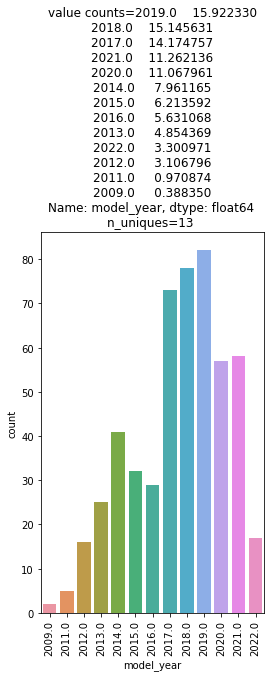

In [169]:
## countplot of model year

plt.figure(figsize=(4, 7))
sns.countplot(x=df.model_year)
plt.xticks(rotation = 90)

norm_count = df.model_year.value_counts(normalize = True)*100
n_uni = df.model_year.nunique()

plt.title(f'value counts={norm_count} \nn_uniques={n_uni} ')

Text(0.5, 1.0, 'value counts=1st    71.456311\n2nd    26.407767\n3rd     2.135922\nName: ownership, dtype: float64 \nn_uniques=3 ')

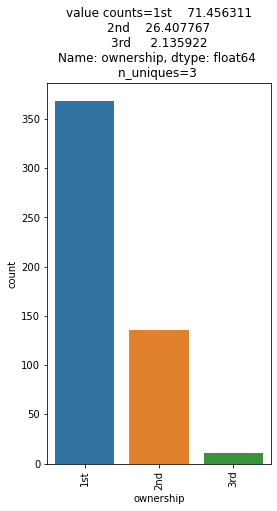

In [171]:
## count plot of ownership

plt.figure(figsize=(4, 7))
sns.countplot(x=df.ownership)
plt.xticks(rotation = 90)

norm_count = df.ownership.value_counts(normalize = True)*100
n_uni = df.ownership.nunique()

plt.title(f'value counts={norm_count} \nn_uniques={n_uni} ')

## Bi-variate Analysis

In [111]:
df.head()

,car_title,engine_transmission,car_details,car_price,km_driven,ownership,fuel_type,Registration,model_year,car_name,transmission,brand
0,2015 Maruti Swift Dzire,VXI Manual,"94,590 km\n1st Owner\nPetrol\nTS-07",470699.0,94590.0,1st,Petrol,TS-07,2015.0,Maruti Swift Dzire,Manual,Maruti
1,2014 Hyundai Eon,ERA PLUS Manual,"69,079 km\n1st Owner\nPetrol\nTS-10",292299.0,69079.0,1st,Petrol,TS-10,2014.0,Hyundai Eon,Manual,Hyundai
2,2018 Maruti Ertiga,ZDI PLUS SHVS Manual,"68,297 km\n1st Owner\nDiesel\nTS-07",993899.0,68297.0,1st,Diesel,TS-07,2018.0,Maruti Ertiga,Manual,Maruti
3,2020 Maruti Swift,VXI Manual,"10,056 km\n2nd Owner\nPetrol\nAP-39",643499.0,10056.0,2nd,Petrol,AP-39,2020.0,Maruti Swift,Manual,Maruti
4,2021 Mahindra Scorpio,S11 Manual,"43,956 km\n1st Owner\nDiesel\nAP-39",1629399.0,43956.0,1st,Diesel,AP-39,2021.0,Mahindra Scorpio,Manual,Mahindra


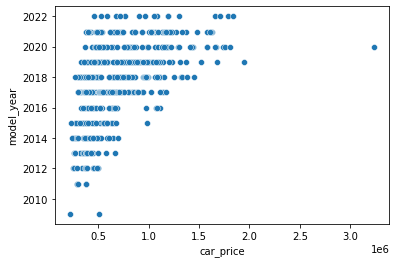

In [125]:
###problem : what is the price of cars in each model year ?


## analysis of car_price, model_year

sns.scatterplot(x=df.car_price,y=df.model_year)
plt.show()

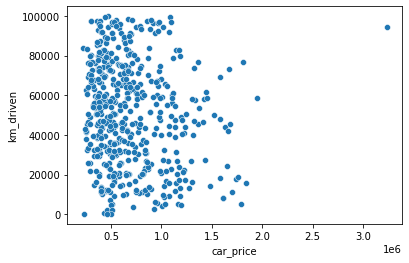

In [126]:
### problem : Total cars according to car price and km driven ?

sns.scatterplot(x=df.car_price,y=df.km_driven)
plt.show()

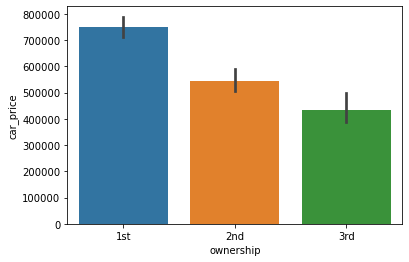

In [177]:
### problem : whats the average price of car of each ownership ?

sns.barplot(x=df.ownership,y=df.car_price)
plt.show()

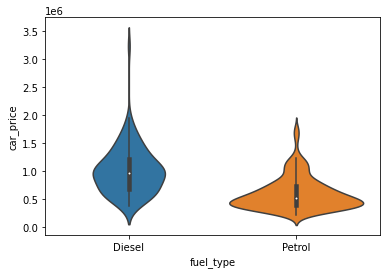

In [178]:
### problem: whats the average price of car of fuel types ?

sns.violinplot(x=df.fuel_type,y=df.car_price)
plt.show()

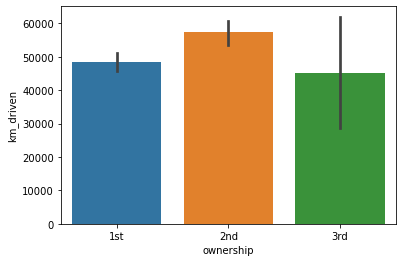

In [181]:
### problem : how many km are completed on average by every ownership ?


sns.barplot(x=df.ownership,y=df.km_driven)
plt.show()

In [182]:
### problem :what is the ownership type of every model year ?

pd.crosstab(df.model_year,df.ownership)

ownership,1st,2nd,3rd
model_year,,,
2009.0,0,2,0
2011.0,3,1,1
2012.0,9,6,1
2013.0,12,13,0
2014.0,23,15,3
2015.0,17,14,1
2016.0,16,12,1
2017.0,52,21,0
2018.0,57,17,4


In [184]:
### problem : what is the min ,max and average price of every car brand ?

df.groupby(['brand']).agg({'car_price' : ['min', 'max', 'mean']})

car_price                         
                  min        max          mean
brand                                         
Datsun       298899.0   533399.0  3.770768e+05
Ford         536999.0  3237699.0  9.559457e+05
Honda        374499.0  1274199.0  7.277677e+05
Hyundai      217099.0  1605999.0  6.631957e+05
Jeep        1322499.0  1516699.0  1.414249e+06
KIA         1170299.0  1808599.0  1.424122e+06
MARUTI      1304699.0  1304699.0  1.304699e+06
MG          1577699.0  1760299.0  1.664874e+06
Mahindra     419299.0  1704999.0  1.236107e+06
Maruti       227299.0  1232199.0  5.640858e+05
Nissan       418499.0  1022199.0  5.972419e+05
Renault      302249.0  1205599.0  5.459961e+05
SKODA       1786749.0  1786749.0  1.786749e+06
Skoda        684799.0  1943999.0  1.110070e+06
Tata         600599.0  1839699.0  9.226490e+05
Toyota       504299.0  1135899.0  7.644990e+05
Volkswagen   389399.0   993299.0  7.443046e+05

<AxesSubplot:xlabel='brand'>

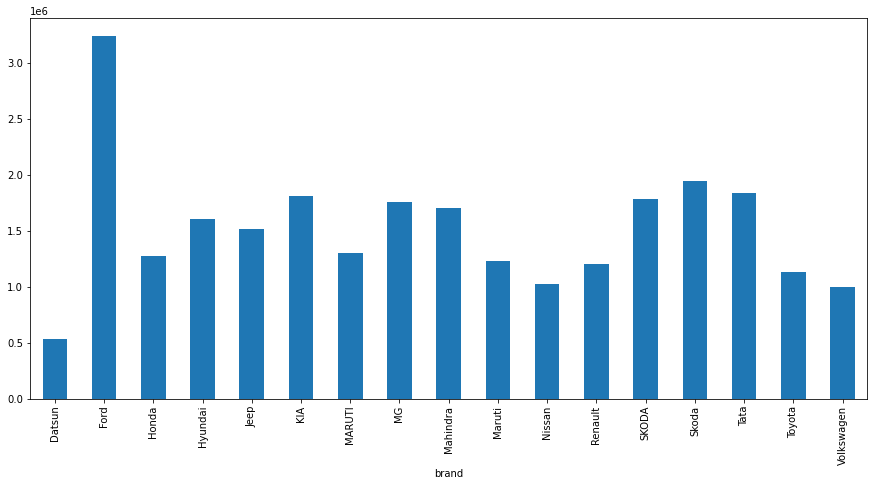

In [185]:
### problem : what is the maximum price of car price of each brand ?

plt.figure(figsize=(15, 7))
df.groupby(['brand'])['car_price'].max().plot(kind = 'bar')

<AxesSubplot:xlabel='brand'>

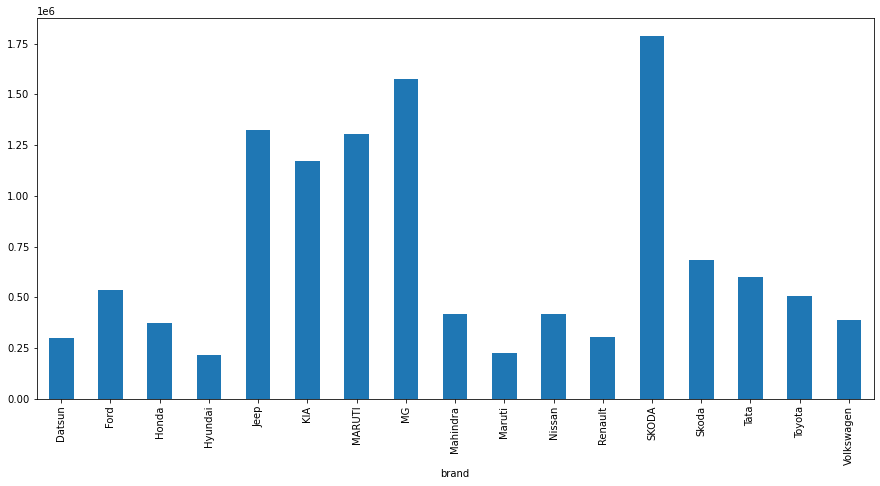

In [186]:
### problem : what is the minimum price of car price of each brand ?

plt.figure(figsize=(15, 7))
df.groupby(['brand'])['car_price'].min().plot(kind = 'bar')

## multivariate analysis

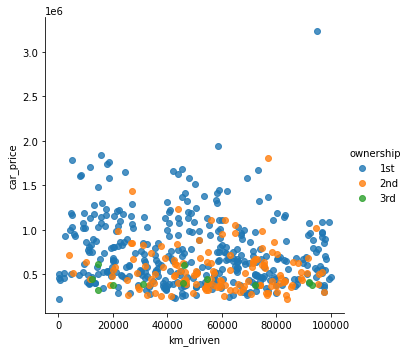

In [198]:
### problem: show the car price and km covered by car according to the type of ownership ?

sns.lmplot(x='km_driven', y='car_price', hue='ownership',data=df.loc[df['ownership'].isin(['1st', '2nd', '3rd'])], 
           fit_reg=False)

<AxesSubplot:xlabel='km_driven', ylabel='car_price'>

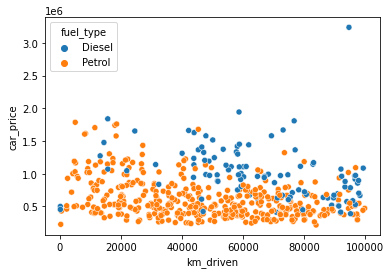

In [191]:
### problem: show the car price and km covered by car according to the type of fuel type ?

sns.scatterplot(x="km_driven", y="car_price", hue='fuel_type', data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '2009.0'),
  Text(1, 0, '2011.0'),
  Text(2, 0, '2012.0'),
  Text(3, 0, '2013.0'),
  Text(4, 0, '2014.0'),
  Text(5, 0, '2015.0'),
  Text(6, 0, '2016.0'),
  Text(7, 0, '2017.0'),
  Text(8, 0, '2018.0'),
  Text(9, 0, '2019.0'),
  Text(10, 0, '2020.0'),
  Text(11, 0, '2021.0'),
  Text(12, 0, '2022.0')])

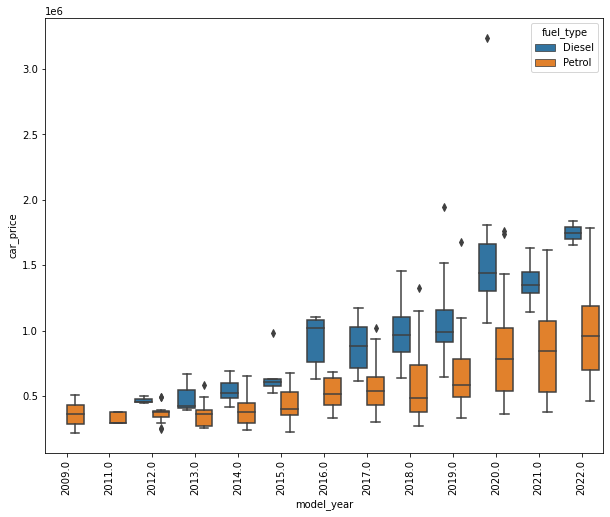

In [214]:
### problem : what are the prices of cars in different model years according to the fuel type ?

plt.figure(figsize=(10, 8))
sns.boxplot(x="model_year", y="car_price", hue='fuel_type', data=df)
plt.xticks(rotation=90)

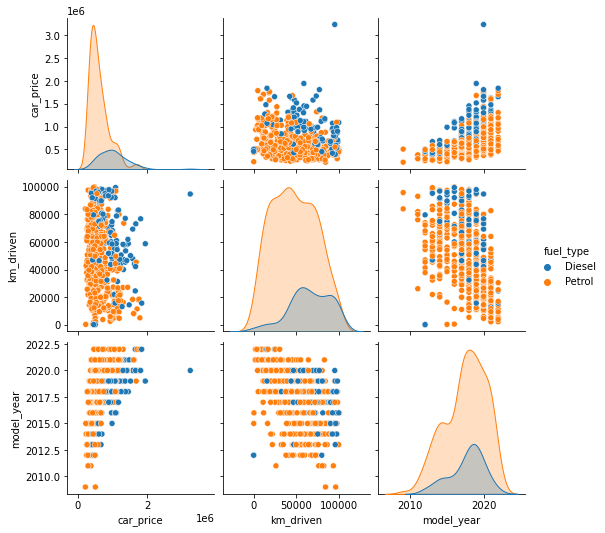

In [81]:
# pairplot and heatmap 

sns.pairplot(df, hue ='fuel_type')

In [94]:
df.head()

,brand,car_title,engine_transmission,car_details,car_price,km_driven,ownership,fuel_type,Registration,model_year,car_name,transmission
0,Maruti,2015 Maruti Swift Dzire,VXI Manual,"94,590 km\n1st Owner\nPetrol\nTS-07",470699.0,94590.0,1st,Petrol,TS-07,2015.0,Maruti Swift Dzire,Manual
1,Hyundai,2014 Hyundai Eon,ERA PLUS Manual,"69,079 km\n1st Owner\nPetrol\nTS-10",292299.0,69079.0,1st,Petrol,TS-10,2014.0,Hyundai Eon,Manual
2,Maruti,2018 Maruti Ertiga,ZDI PLUS SHVS Manual,"68,297 km\n1st Owner\nDiesel\nTS-07",993899.0,68297.0,1st,Diesel,TS-07,2018.0,Maruti Ertiga,Manual
3,Maruti,2020 Maruti Swift,VXI Manual,"10,056 km\n2nd Owner\nPetrol\nAP-39",643499.0,10056.0,2nd,Petrol,AP-39,2020.0,Maruti Swift,Manual
4,Mahindra,2021 Mahindra Scorpio,S11 Manual,"43,956 km\n1st Owner\nDiesel\nAP-39",1629399.0,43956.0,1st,Diesel,AP-39,2021.0,Mahindra Scorpio,Manual


(array([0.5, 1.5, 2.5]),
 [Text(0.5, 0, 'model_year'),
  Text(1.5, 0, 'km_driven'),
  Text(2.5, 0, 'car_price')])

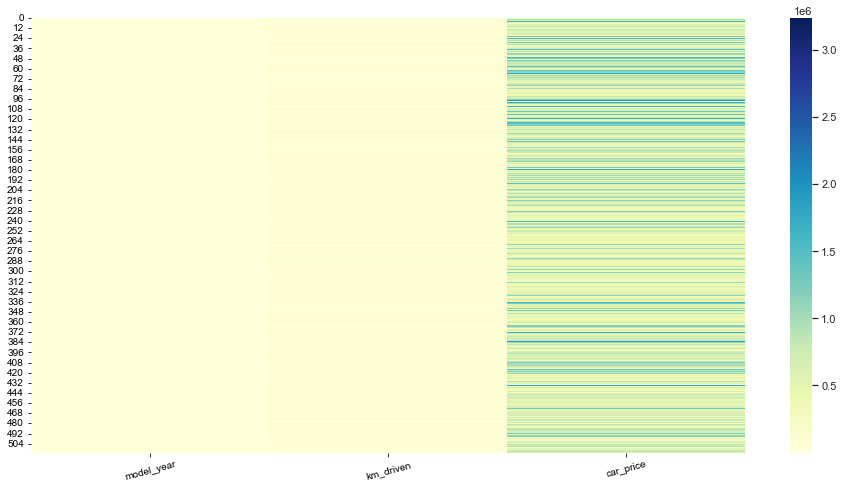

In [95]:
# plotting the heatmap 
fig, ax = plt.subplots(figsize=(16,8))
sns.set()
sns.heatmap(df[['model_year','km_driven','car_price']], cmap='YlGnBu')
plt.xticks(rotation=15)